In [ ]:
!unzip /content/drive/MyDrive/GTSRB.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
height = 30
width = 30
channels = 3

In [ ]:
data = []
labels = []
NUM_CATEGORIES = len(os.listdir('GTSRB'))

In [ ]:
classes=os.listdir('GTSRB')
classes.sort()

In [17]:
NUM_CATEGORIES
os.path.join('GTSRB',classes[0])

'GTSRB/00000'

In [ ]:
for i in range(NUM_CATEGORIES):
    path = os.path.join('GTSRB',classes[i])
    images = os.listdir(path)
    
    for a in images:
       
            image = Image.open(path + '/' + a)
            image = image.resize((height,width))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        
data = np.array(data)      
labels = np.array(labels)    

In [32]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state=42, shuffle=True)

X_train = X_train/255 
X_test = X_test/255

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [35]:
Y_train=keras.utils.to_categorical(Y_train,NUM_CATEGORIES)
Y_test= keras.utils.to_categorical(Y_test,NUM_CATEGORIES)

print(Y_train.shape)
print(Y_test.shape)

(31367, 43)
(7842, 43)


In [36]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)         

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [40]:
batch_size = 32
epochs = 15

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, Y_test) )

Epoch 1/15
981/981 [==============================] - 111s 113ms/step - loss: 0.1546 - accuracy: 0.9510 - val_loss: 0.0188 - val_accuracy: 0.9944
Epoch 2/15
981/981 [==============================] - 114s 117ms/step - loss: 0.1467 - accuracy: 0.9556 - val_loss: 0.0135 - val_accuracy: 0.9963
Epoch 3/15
981/981 [==============================] - 114s 116ms/step - loss: 0.1290 - accuracy: 0.9605 - val_loss: 0.0175 - val_accuracy: 0.9953
Epoch 4/15
981/981 [==============================] - 114s 116ms/step - loss: 0.1181 - accuracy: 0.9636 - val_loss: 0.0177 - val_accuracy: 0.9948
Epoch 5/15
981/981 [==============================] - 115s 117ms/step - loss: 0.1209 - accuracy: 0.9635 - val_loss: 0.0144 - val_accuracy: 0.9952
Epoch 6/15
981/981 [==============================] - 115s 117ms/step - loss: 0.1075 - accuracy: 0.9668 - val_loss: 0.0109 - val_accuracy: 0.9968
Epoch 7/15
981/981 [==============================] - 114s 117ms/step - loss: 0.0973 - accuracy: 0.9708 - val_loss: 0.0100 -

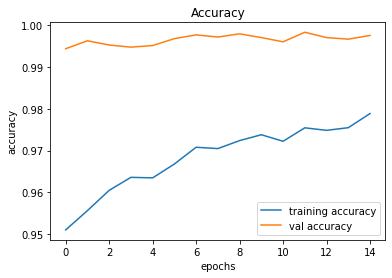

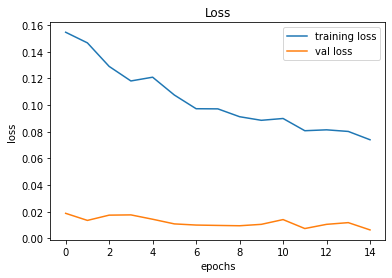

In [41]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
!unzip /content/Test.zip

In [43]:
test = pd.read_csv('/content/Test.csv')
labels = test["ClassId"].values
images = test["Path"].values
data2=[]
for a in images:
        
            image = Image.open('/content/' + a)
            image = image.resize((height,width))
            image = np.array(image)
            data2.append(image)

len(data2)

12630

In [52]:
X_pred = np.array(data2)
X_pred = X_pred/255

pred = model.predict_classes(X_pred)

len(pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12630

In [53]:
check=[]
lbl=[]
for i in range(len(pred)):
    if pred[i]!=labels[i]:
        check.append(data2[i])
        lbl.append([pred[i] , labels[i]])

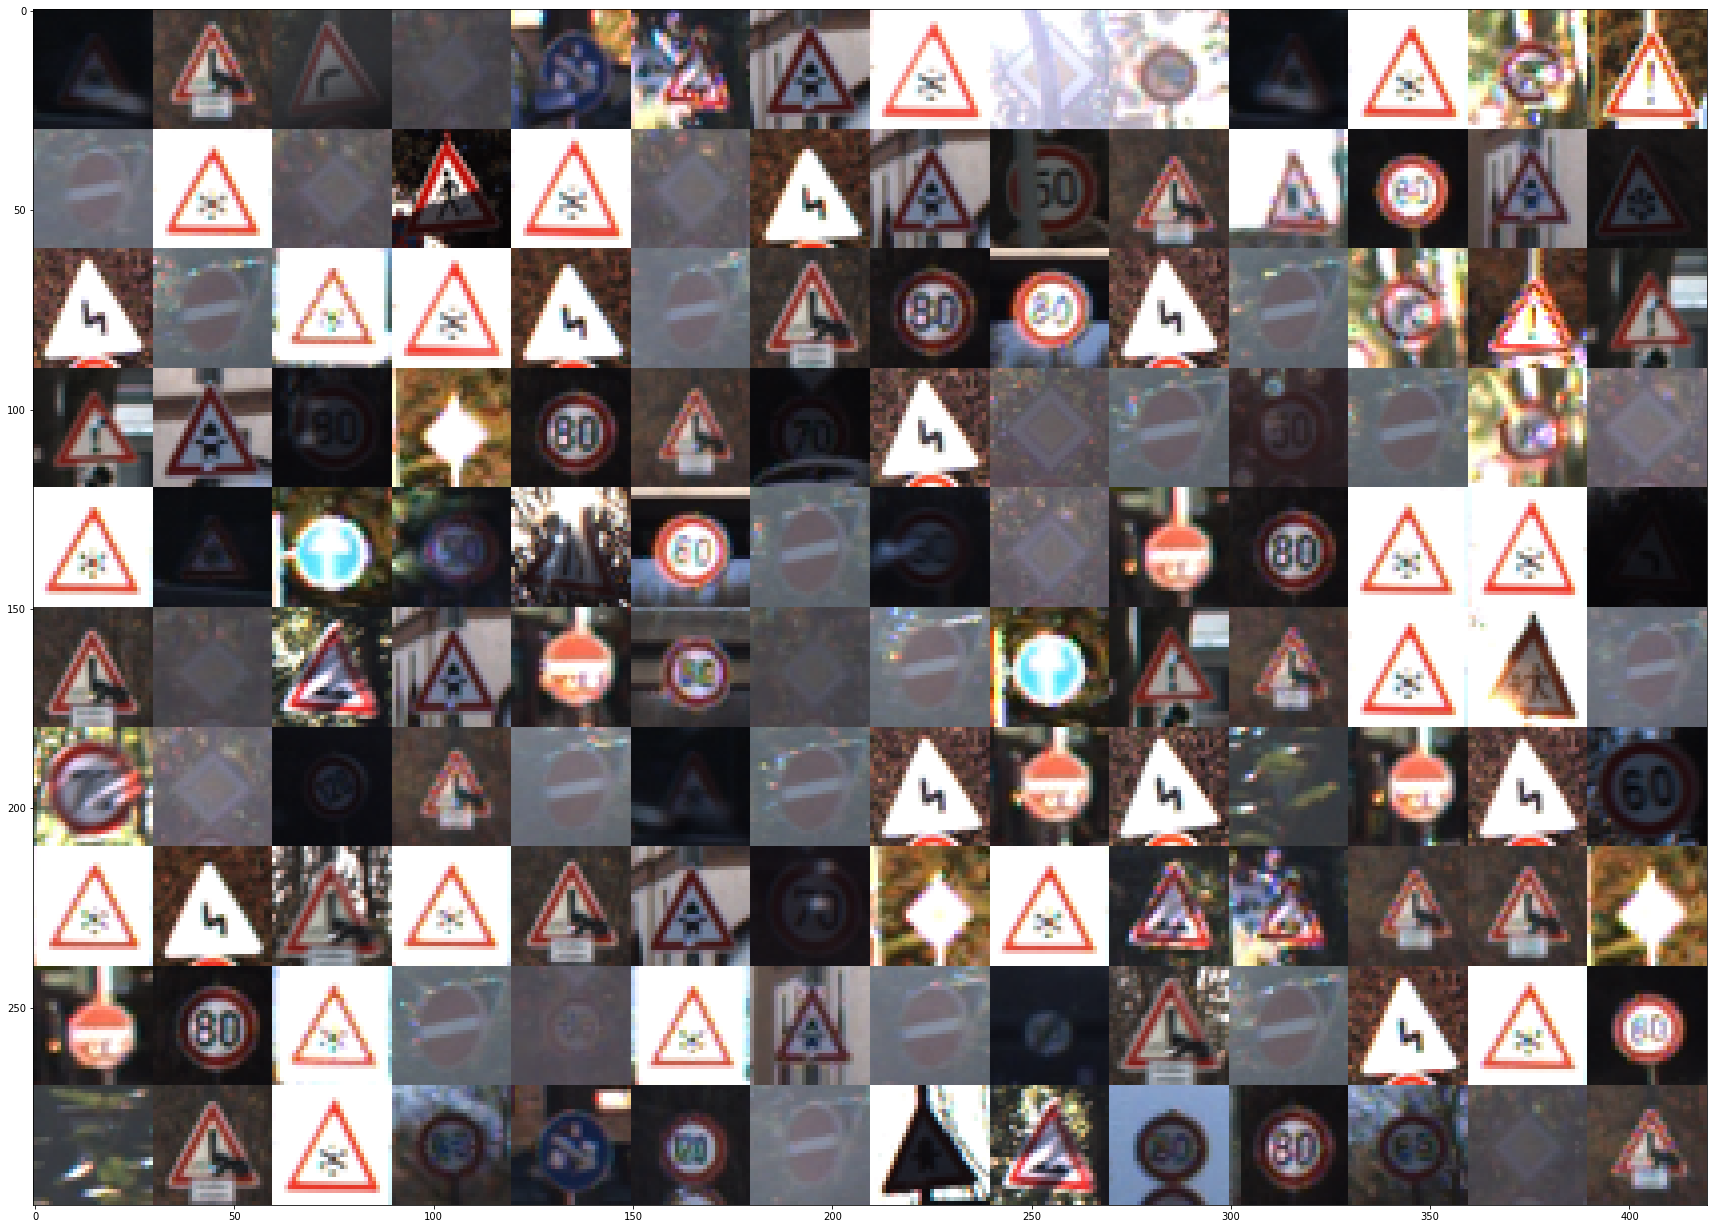

In [45]:
plt.figure(figsize = (30,30))
plt.imshow(np.array(check[:140]).reshape(10,14 , 30, 30, 3)
              .swapaxes(1,2)
              .reshape(30*10, 30*14, 3))

In [47]:
from sklearn.metrics import accuracy_score

print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  97.90182106096596


In [48]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

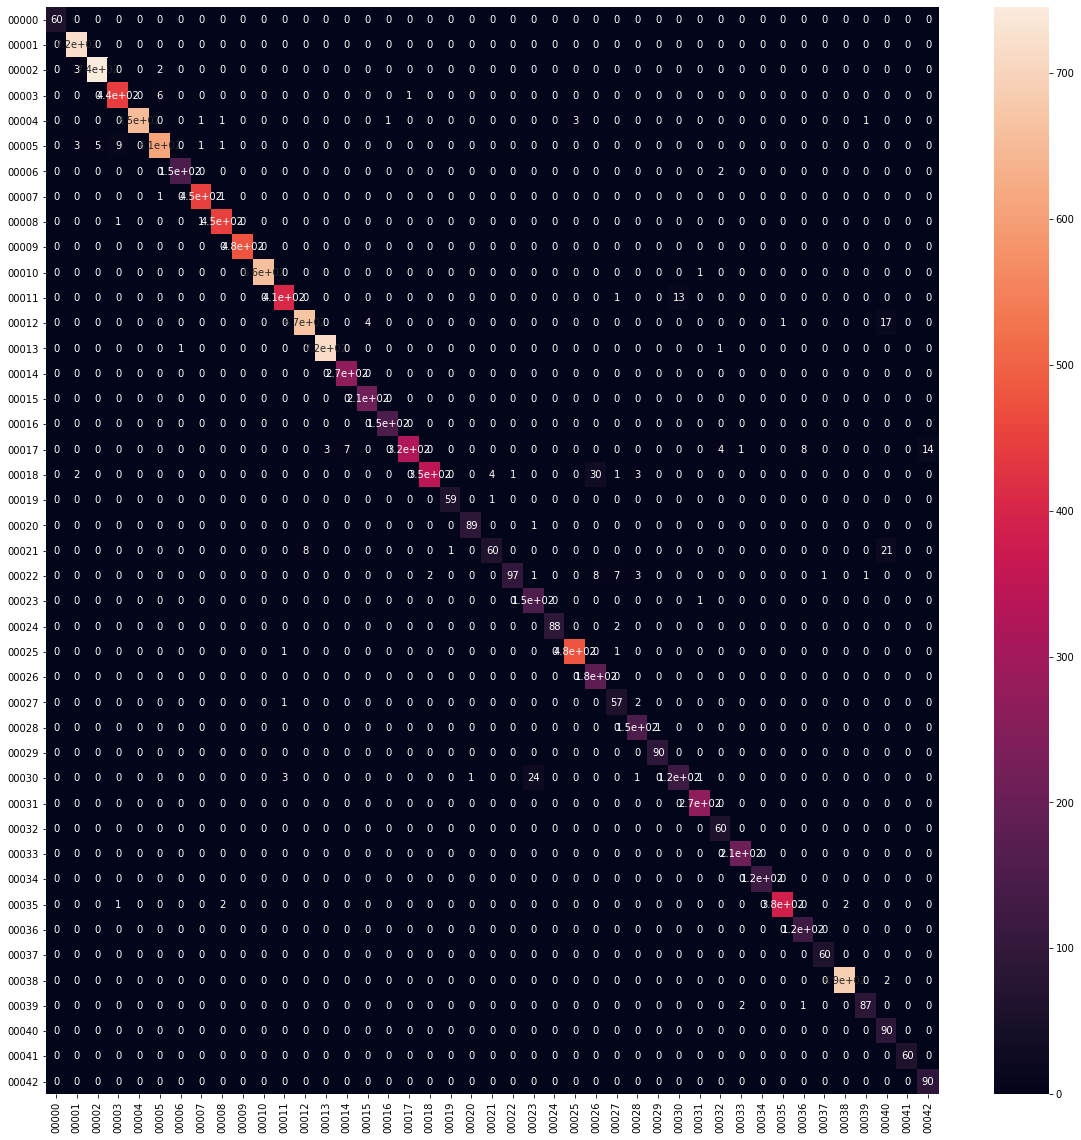

In [49]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      0.99       720
           2       0.99      0.99      0.99       750
           3       0.98      0.98      0.98       450
           4       1.00      0.99      0.99       660
           5       0.99      0.97      0.98       630
           6       0.99      0.99      0.99       150
           7       0.99      1.00      0.99       450
           8       0.99      1.00      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      0.97      0.98       420
          12       0.99      0.97      0.98       690
          13       1.00      1.00      1.00       720
          14       0.97      1.00      0.99       270
          15       0.98      1.00      0.99       210
          16       0.99      1.00      1.00       150
          17       1.00    